In [100]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [5]:
100 * df.isnull().sum() / len(df)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.256281
manufacturer      4.760135
model             1.422282
condition        42.860257
cylinders        38.174689
fuel              0.686247
odometer         17.241751
title_status      0.414364
transmission      0.492372
vin              45.119296
drive            27.993869
size             67.904481
type             26.868939
paint_color      31.030701
image_url         0.005506
description       0.006195
county          100.000000
state             0.000000
lat               1.889416
long              1.889416
dtype: float64

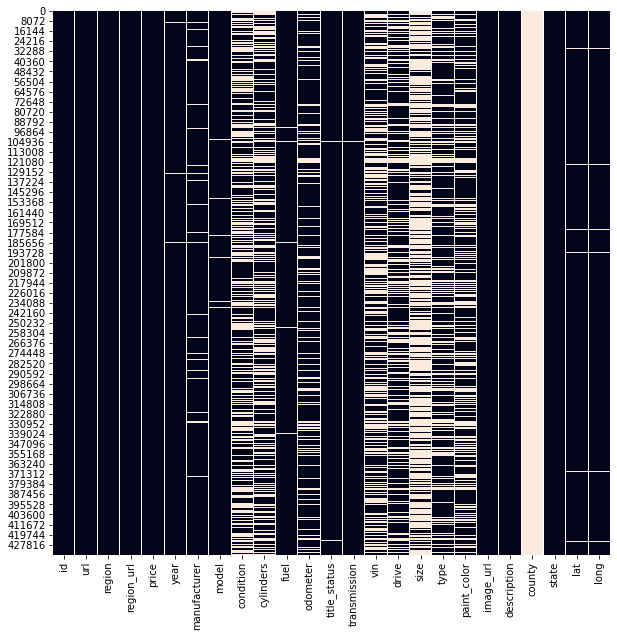

In [103]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar=False);

In [6]:
df['manufacturer'].unique()

array(['jeep', 'bmw', 'dodge', 'chevrolet', nan, 'ford', 'ram', 'honda',
       'toyota', 'nissan', 'subaru', 'gmc', 'volkswagen', 'kia', 'acura',
       'chrysler', 'hyundai', 'cadillac', 'volvo', 'mini',
       'mercedes-benz', 'audi', 'mazda', 'pontiac', 'buick', 'infiniti',
       'mitsubishi', 'rover', 'lincoln', 'lexus', 'fiat', 'jaguar',
       'mercury', 'saturn', 'datsun', 'porche', 'tesla',
       'harley-davidson', 'ferrari', 'land rover', 'alfa-romeo', 'morgan',
       'aston-martin'], dtype=object)

In [7]:
df.year.describe()

count    434732.000000
mean       2009.866460
std           9.312503
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [8]:
df.odometer.describe()

count    3.607010e+05
mean     9.897590e+04
std      1.134990e+05
min      0.000000e+00
25%      4.733300e+04
50%      9.118800e+04
75%      1.347360e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [106]:
df[df['odometer'] > 300000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
267,7120302677,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,1996.0,ford,f-250,NaN,8 cylinders,diesel,340272.0,clean,manual,1FTHX26F4TEA74745,4wd,NaN,truck,NaN,https://images.craigslist.org/00K0K_3wneG97zmf...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
932,7121507543,https://phoenix.craigslist.org/evl/cto/d/mesa-...,phoenix,https://phoenix.craigslist.org,1500,2007.0,ford,focus,good,4 cylinders,gas,330000.0,clean,automatic,NaN,fwd,compact,sedan,black,https://images.craigslist.org/00n0n_h6JcY0dnjE...,"Body excellent, interior excellent. Electric s...",NaN,az,33.3848,-111.8970
1002,7111631846,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,14950,2015.0,NaN,ISUZU NRR,excellent,4 cylinders,diesel,300990.0,clean,automatic,JALE5W160F7302514,NaN,full-size,truck,white,https://images.craigslist.org/00101_a5nwKAiTlM...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2015 ISUZU ...,NaN,sd,43.8634,-95.1139
1053,7111563446,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,9950,2005.0,ford,excursion,good,8 cylinders,diesel,302724.0,clean,automatic,1FMSU45P45EB76677,4wd,full-size,SUV,blue,https://images.craigslist.org/01010_gBwSj7m7ll...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2005 FORD E...,NaN,sd,43.8633,-95.1138
1157,7121484986,https://phoenix.craigslist.org/nph/cto/d/phoen...,phoenix,https://phoenix.craigslist.org,9500,1994.0,NaN,freightliner fld120,good,6 cylinders,diesel,400000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01313_87b6MXOX7S...,1994 freightliner FlD120 New steer Tirs 10 sp...,NaN,az,33.6299,-112.1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434587,7109287314,https://richmond.craigslist.org/ctd/d/greensbo...,richmond,https://richmond.craigslist.org,0,2013.0,NaN,PETERBILT 389,NaN,NaN,diesel,714915.0,clean,manual,1XPXD49X7DD197000,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_f9Jlh6mMKV...,Piedmont Peterbilt Internet Sales at 336-203-8...,NaN,va,36.0334,-79.8626
434815,7121452118,https://flagstaff.craigslist.org/cto/d/flagsta...,flagstaff / sedona,https://flagstaff.craigslist.org,3100,2007.0,toyota,prius hybrid,good,4 cylinders,hybrid,308000.0,clean,automatic,NaN,fwd,compact,hatchback,red,https://images.craigslist.org/00Y0Y_dgt8zIdQQH...,Everything works as it should A/c = COLD Heate...,NaN,az,35.1859,-111.6620
435297,7117495221,https://medford.craigslist.org/ctd/d/gladstone...,medford-ashland,https://medford.craigslist.org,0,1999.0,ram,2500 laramie slt long,excellent,6 cylinders,diesel,352781.0,clean,automatic,1B7KF2366XJ569670,4wd,full-size,truck,blue,https://images.craigslist.org/00Y0Y_4t9sTDdkC5...,Carz Planet STOCK #: 6498 💲 💲 FOR...,NaN,or,45.3860,-122.6080
435728,7119682628,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,5900,1999.0,gmc,t6500,NaN,NaN,diesel,320000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_5EsIro50yr...,GMC T6500 Stake Bed. 320k miles. CAT Diesel. E...,NaN,az,34.4814,-114.3480


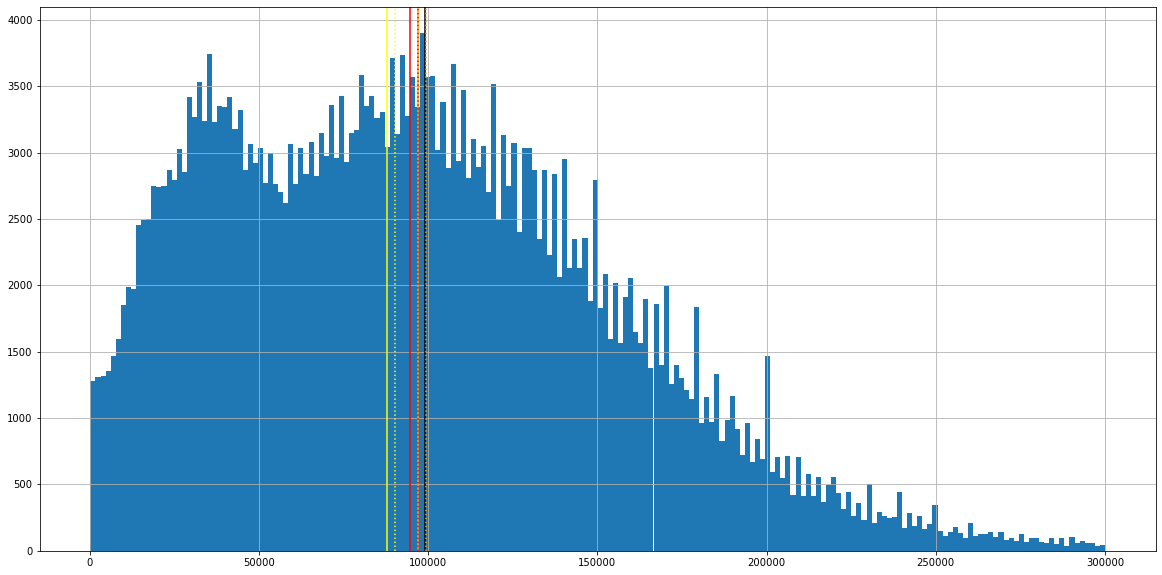

In [109]:
plt.figure(figsize = (20,10))
df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer'].hist(bins = 200)
plt.axvline(df['odometer'].mean(), color = 'black')
plt.axvline(df[df['odometer'] < 1000000]['odometer'].mean(), color = 'orange')
plt.axvline(df[df['odometer'] < 300000]['odometer'].mean(), color = 'red')
plt.axvline(df[df['odometer'] < 200000]['odometer'].mean(), color = 'yellow')
plt.axvline(df[(df['odometer'] < 1000000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'orange', ls = ':')
plt.axvline(df[(df['odometer'] < 300000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'red', ls = ':')
plt.axvline(df[(df['odometer'] < 200000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'yellow', ls = ':')

In [49]:
bins = np.arange(df['year'].min(), df['year'].max(), 10)
bins = np.append(bins, 2021)
groups = pd.cut(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['year'], bins, include_lowest=True)

In [46]:
od_avgs = []
for i in range(1000):
    od_avgs.append(sum(random.sample(list(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer']), 1000)) / 1000)
od_avg = sum(od_avgs) / 1000
od_avg

96870.71808399986

In [ ]:
(df['odometer'] ==).sum()

In [89]:
od_decade_means = df[(df['odometer'] < 300000) & (df['odometer'] > 250)].groupby(groups)['odometer'].agg(['mean', 'size']).head(500)

In [111]:
od_decade_means

,mean,size
year,,
"(1899.999, 1910.0]",86779.000000,1
"(1910.0, 1920.0]",7675.000000,6
"(1920.0, 1930.0]",34051.344828,58
"(1930.0, 1940.0]",24165.683761,117
"(1940.0, 1950.0]",41519.645833,144
"(1950.0, 1960.0]",49592.645892,353
"(1960.0, 1970.0]",59458.211575,1054
"(1970.0, 1980.0]",70270.250165,1511
"(1980.0, 1990.0]",105626.272727,2442


In [104]:
conditions = [
                (df['year'] <= 1910) & (df['odometer'].isnull()),
                (df['year'] > 1910) & (df['year'] <= 1920) & (df['odometer'].isnull()),
                (df['year'] > 1920) & (df['year'] <= 1930) & (df['odometer'].isnull()),
                (df['year'] > 1930) & (df['year'] <= 1940) & (df['odometer'].isnull()),
                (df['year'] > 1940) & (df['year'] <= 1950) & (df['odometer'].isnull()),
                (df['year'] > 1950) & (df['year'] <= 1960) & (df['odometer'].isnull()),
                (df['year'] > 1960) & (df['year'] <= 1970) & (df['odometer'].isnull()),
                (df['year'] > 1970) & (df['year'] <= 1980) & (df['odometer'].isnull()),
                (df['year'] > 1980) & (df['year'] <= 1990) & (df['odometer'].isnull()),
                (df['year'] > 1990) & (df['year'] <= 2000) & (df['odometer'].isnull()),
                (df['year'] > 2000) & (df['year'] <= 2010) & (df['odometer'].isnull()),
                (df['year'] > 2010) & (df['year'] <= 2020) & (df['odometer'].isnull()),
                (df['year'] > 2020) & (df['odometer'].isnull())
]

choices = [
            int(od_decade_means.iloc[0,0]),
            int(od_decade_means.iloc[1,0]),
            int(od_decade_means.iloc[2,0]),
            int(od_decade_means.iloc[3,0]),
            int(od_decade_means.iloc[4,0]),
            int(od_decade_means.iloc[5,0]),
            int(od_decade_means.iloc[6,0]),
            int(od_decade_means.iloc[7,0]),
            int(od_decade_means.iloc[8,0]),
            int(od_decade_means.iloc[9,0]),
            int(od_decade_means.iloc[10,0]),
            int(od_decade_means.iloc[11,0]),
            int(od_decade_means.iloc[12,0])
]
df_clean = df.copy()
df_clean['odometer'] = np.select(conditions, choices, default = df['odometer'])

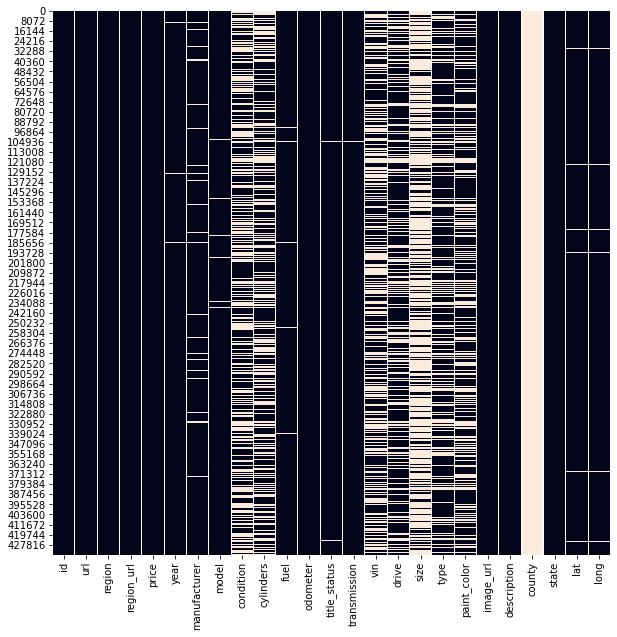

In [105]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);

In [196]:
df_clean['region'].unique().size

403

In [197]:
paint_color_probs_dict = df_clean.groupby(by = ['manufacturer'])['paint_color'].value_counts(normalize = True).unstack().to_dict('index')

In [198]:
paint_color_probs_dict

{'acura': {'black': 0.24325396825396825,
  'blue': 0.06746031746031746,
  'brown': 0.016666666666666666,
  'custom': 0.023412698412698413,
  'green': 0.013095238095238096,
  'grey': 0.1742063492063492,
  'orange': 0.0011904761904761906,
  'purple': 0.0007936507936507937,
  'red': 0.04563492063492063,
  'silver': 0.19007936507936507,
  'white': 0.22420634920634921,
  'yellow': nan},
 'alfa-romeo': {'black': 0.18181818181818182,
  'blue': 0.09090909090909091,
  'brown': nan,
  'custom': nan,
  'green': 0.05454545454545454,
  'grey': 0.10909090909090909,
  'orange': nan,
  'purple': nan,
  'red': 0.2545454545454545,
  'silver': 0.03636363636363636,
  'white': 0.2545454545454545,
  'yellow': 0.01818181818181818},
 'aston-martin': {'black': 0.22727272727272727,
  'blue': 0.13636363636363635,
  'brown': nan,
  'custom': 0.045454545454545456,
  'green': 0.22727272727272727,
  'grey': 0.045454545454545456,
  'orange': nan,
  'purple': nan,
  'red': 0.045454545454545456,
  'silver': 0.272727272

In [199]:
rand_choice_paint_color_probs_dict = {}
for i in paint_color_probs_dict:
    colors_list = []
    probs_list = []
    for j in paint_color_probs_dict[i]: 
        if paint_color_probs_dict[i][j] > 0:
            colors_list.append(j)
            probs_list.append(paint_color_probs_dict[i][j])
#             temp_dict[j] = paint_color_probs_dict[i][j]
    rand_choice_paint_color_probs_dict[i] = {'colors': colors_list, 'probabilities': probs_list}
                            
rand_choice_paint_color_probs_dict

{'acura': {'colors': ['black',
   'blue',
   'brown',
   'custom',
   'green',
   'grey',
   'orange',
   'purple',
   'red',
   'silver',
   'white'],
  'probabilities': [0.24325396825396825,
   0.06746031746031746,
   0.016666666666666666,
   0.023412698412698413,
   0.013095238095238096,
   0.1742063492063492,
   0.0011904761904761906,
   0.0007936507936507937,
   0.04563492063492063,
   0.19007936507936507,
   0.22420634920634921]},
 'alfa-romeo': {'colors': ['black',
   'blue',
   'green',
   'grey',
   'red',
   'silver',
   'white',
   'yellow'],
  'probabilities': [0.18181818181818182,
   0.09090909090909091,
   0.05454545454545454,
   0.10909090909090909,
   0.2545454545454545,
   0.03636363636363636,
   0.2545454545454545,
   0.01818181818181818]},
 'aston-martin': {'colors': ['black',
   'blue',
   'custom',
   'green',
   'grey',
   'red',
   'silver'],
  'probabilities': [0.22727272727272727,
   0.13636363636363635,
   0.045454545454545456,
   0.22727272727272727,
   0.045

In [203]:
rand_choice_paint_color_probs_dict.keys()

dict_keys(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan', 'pontiac', 'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo'])

In [ ]:
conditions = [
                (df_clean['paint_color'].isnull()) & (df['model'] == 'acura')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'alfa-romeo')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'aston-martin')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'audi')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'bmw')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'buick')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'cadillac')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'chevrolet')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'chrysler')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'datsun')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'dodge')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'ferrari')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'fiat')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'ford')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'gmc')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'harley-davidson')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'honda')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'hyundai')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'infiniti')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'jaguar')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'jeep')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'kia')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'land rover')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'lexus')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'lincoln')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'mazda')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'mercedes-benz')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'mercury')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'mini')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'mitsubishi')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'morgan')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'nissan')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'pontiac')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'porche')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'ram')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'rover')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'saturn')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'subaru')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'tesla')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'toyota')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'volkswagen')
                (df_clean['paint_color'].isnull()) & (df['model'] == 'volvo')
    
]

In [210]:
for key in rand_choice_paint_color_probs_dict.keys():
    conditions = [
                    (df_clean['paint_color'].isnull()) & (df_clean['model'] == key)
    ]
    
    choices = [
                np.random.choice(rand_choice_paint_color_probs_dict[key]['colors'], 1, p=rand_choice_paint_color_probs_dict[key]['probabilities'])
    ]
                                 
    df_clean['paint_color'] = np.select(conditions, choices, default = df_clean['paint_color'])

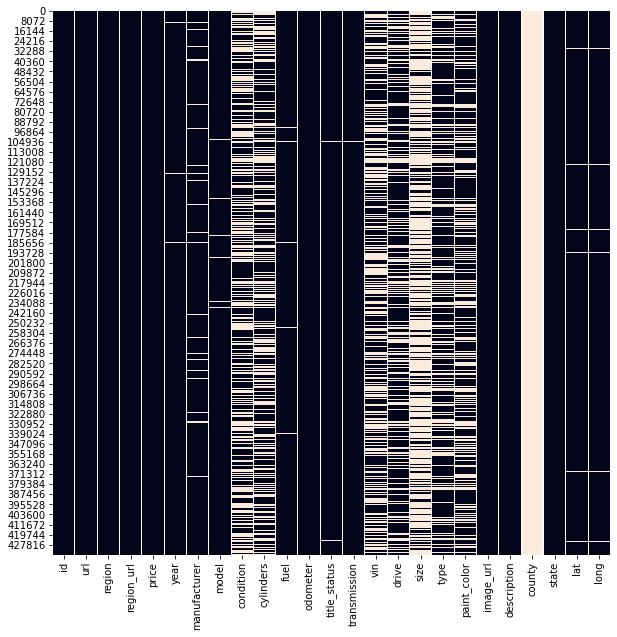

In [211]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);